## Student Knowledge Level Model

### Introduction

To score well on a test, it is important that we use a method of study which has historically and scientifically been proven efficient. Is it better to study one night before the exam for an extended period of time or to distribute study sessions in intervals of 30-40 minutes over a couple of days? 

We aim to establish a relationship between a student’s educational habits and conceptual understanding. Our predictor variables are study time (STG) and frequency of study session (SCG) for a given goal subject. We will study how they correlate with our focus variable which will be the measuring stick of a study strategy's effectiveness, as represented by the knowledge level of the goal subject (UNS). 


### Preliminary exploratory data analysis:

First, we needed to import all of the libraries required for the research of our project:

In [41]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)

In [42]:
knowledge <- read_excel("data/uns_datatable.xls", sheet = "Training_Data", range = cell_cols("A:F"))

In [43]:
knowledge <- mutate(knowledge_data_df, UNS = as_factor(UNS))

We wrangled the data and since our data already comes with training and testing data sets, we only imported the training set observations from the right excel sheet. Then, we filtered the required variables that we need.


Moreover, we investigated the distribution of people of various different knowledge levels in the data set. If one group is very overrepresented, their data could be much more accurate than the other groups, and when paired together, it may yield skewed results.


In [48]:
know_count <- nrow(knowledge)
    knowledge %>%
    group_by(UNS) %>%
    summarize(count = n(),
    percentage = n() / know_count * 100)

`summarise()` ungrouping output (override with `.groups` argument)



UNS,count,percentage
<fct>,<int>,<dbl>
very_low,24,9.302326
High,63,24.418605
Low,83,32.170543
Middle,88,34.108527



The result was a fairly even distribution for each category besides for those in the "very low" scores category. This is an acceptable weakness as scorers in the very low section are already expected to be rare, but as long as the other categories are represented correctly, this outlier shouldn't be too significant.


These histograms were used to observe the distribution of our predictor variables, both of which are already standardized.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



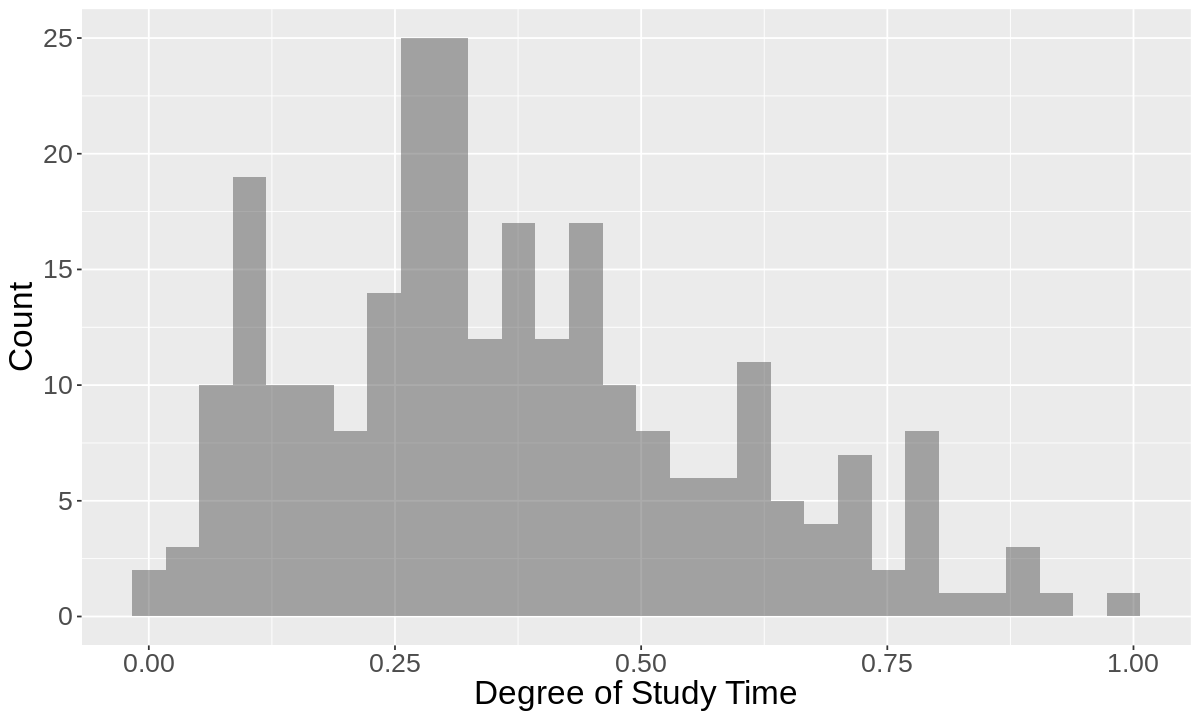

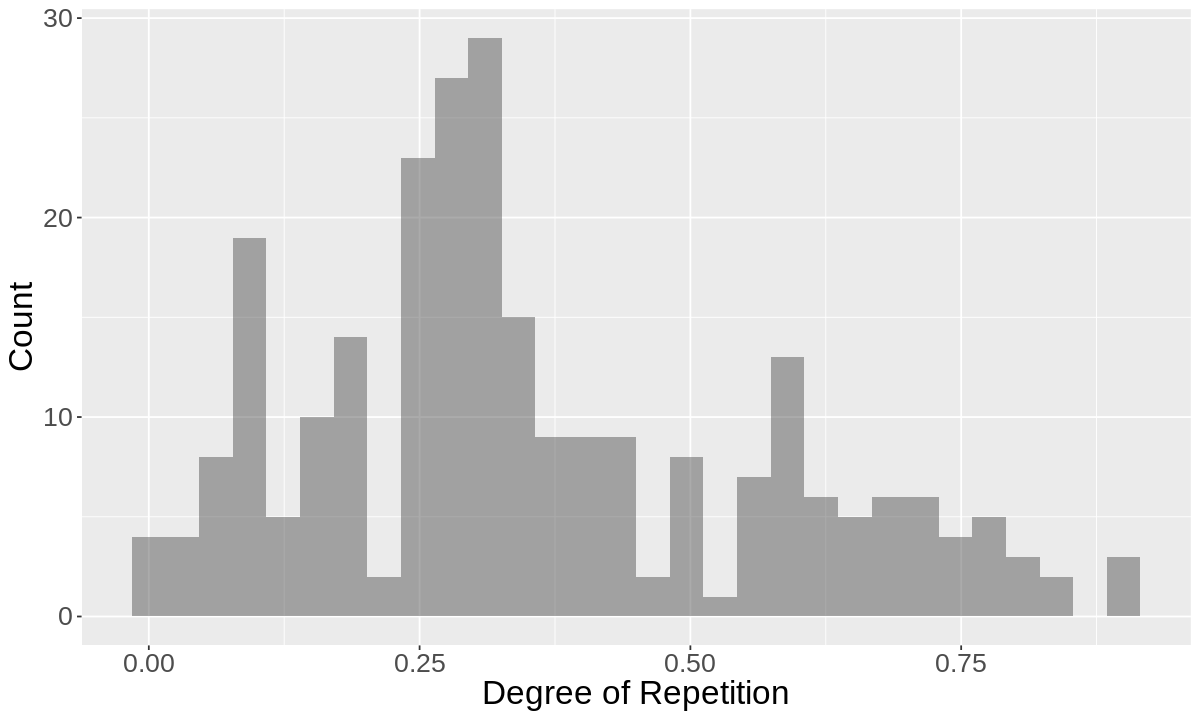

In [49]:
options(repr.plot.width = 10, repr.plot.height = 6)
STG_hist <- ggplot(knowledge, aes(x = STG)) +
    geom_histogram(alpha = 0.5, position = "identity") +
    labs(x = "Degree of Study Time", 
    y = "Count") +
  theme(text = element_text(size = 20))

STG_hist

options(repr.plot.width = 10, repr.plot.height = 6)
SCG_hist <- ggplot(knowledge, aes(x = SCG)) +
    geom_histogram(alpha = 0.5, position = "identity") +
    labs(x = "Degree of Repetition", 
    y = "Count") +
    theme(text = element_text(size = 20))

SCG_hist

There is a concentration of values for both variables around the 0.25 zone, but enough values exist at the other distributions that they are not negligible, so using the entire range of values from the data frame for future steps is acceptable.

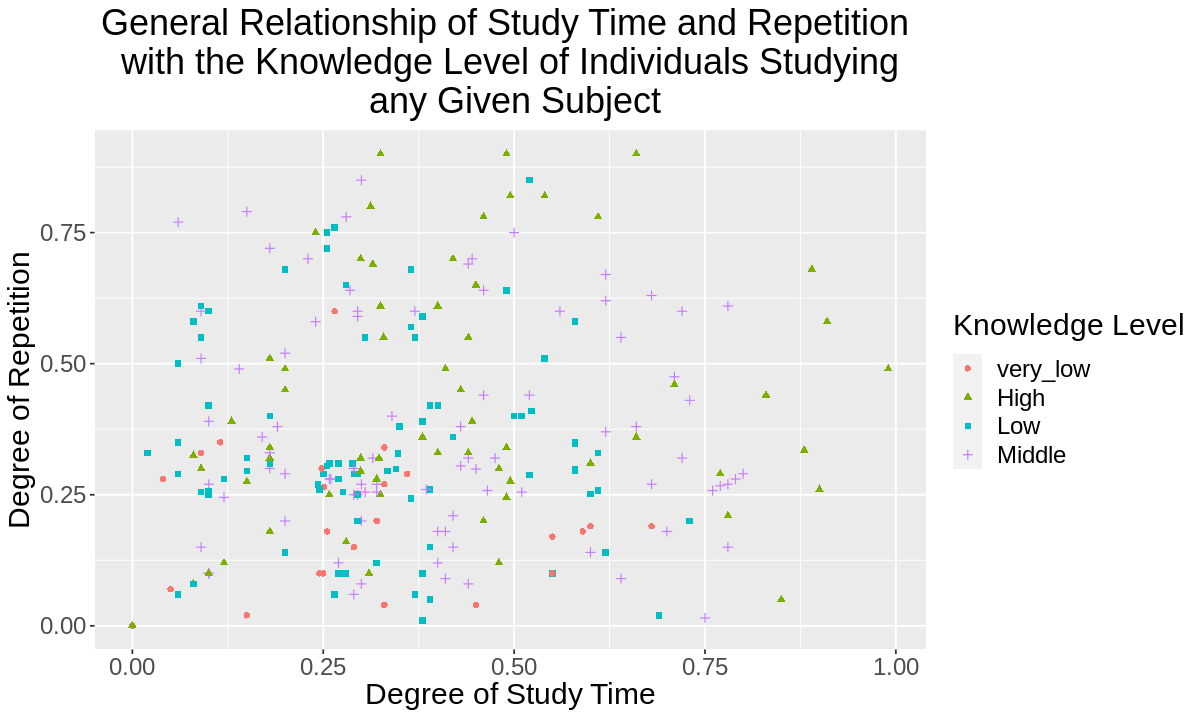

In [58]:
vis_scatter <- knowledge %>% 
ggplot(aes(x = STG, y = SCG, color = UNS, shape = UNS)) +
geom_point() +
labs(x = "Degree of Study Time", y = "Degree of Repetition", color = "Knowledge Level", shape = "Knowledge Level") +
theme(text = element_text(size = 18), plot.title = element_text(hjust = 0.5)) +
ggtitle("General Relationship of Study Time and Repetition \n with the Knowledge Level of Individuals Studying \n any Given Subject")

vis_scatter

Finally, from this graph, it can be observed that higher study times and higher repetitions when studying do lower the possibility of having lower knowledge levels, which means a relationship exists and our research is not meaningless.

### Methodology

We focus on two predictor variables: STG- Degree of Study Time & SCG- Degree of Repetition

Our focus variable (UNS) represents knowledge level and is divided into "very low", "low", "medium" and "high".

We are using the k-nearest neighbour classification technique. Where the Euclidean Distance formula: d(x,y) = sqrt((y2 - y1)^2 + (x2 - x1)^2) is used to find the distance between the 5 closest observations from any test point (we chose k = 5 for now, but this may change as we test more k values in the future). Using this technique, we can predict the UNS of a given point on the graph.

To visualize our results, we will graph our results using a colour prediction map, with values in four different areas representing a high likelihood to fall into any of the four respective UNS categories.


### Expected Outcomes and Significance

We expect to find the relationship between a student’s educational habits and conceptual understanding. Such findings can help change the outlook of what educational habits and study strategies lead to successful learning. Furthermore, our study could give rise to questions such as what is the optimum number of hours or frequency of study sessions for achieving the highest grade.
 
